# Projet n°2 : Analysez des données de systèmes éducatifs

Academy souhaite se lancer dans une expansion à l'international et cherche à déterminer les pays présentant un fort potentiel de clients pour ses services. Ainsi, une première mission d'analyse exploratoire est confiée afin d'évaluer la pertinence des données de la Banque mondiale sur l'éducation pour informer le projet d'expansion. Les questions à explorer concernent notamment les pays à fort potentiel de clients, leur évolution potentielle, et les pays prioritaires pour l'expansion. Il est donc demandé d'effectuer une analyse pré-exploratoire du jeu de données de la Banque mondiale pour valider sa qualité, décrire son contenu, sélectionner les informations pertinentes et fournir des indicateurs statistiques pour les différentes zones géographiques et pays du monde. Cette analyse sera partagée avec le board de l'entreprise afin d'éclairer les décisions d'expansion à venir.

## Chargement des librairies

In [1]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot, transforms
import seaborn as sns
import numpy as np
sns.set()

## Chargement des datasets

In [5]:
file_path = '/Users/admin/Desktop/formation_data_Scientist/projet_2/données/Projet+Python_Dataset_Edstats_csv/'

In [140]:
EdStatsData = pd.read_csv(file_path + 'EdStatsData.csv')
EdStatsCountry_Series = pd.read_csv(file_path + 'EdStatsCountry-Series.csv')
EdStatsCountry = pd.read_csv(file_path + 'EdStatsCountry.csv')
EdStatsFootNote = pd.read_csv(file_path + 'EdStatsFootNote.csv')
EdStatsSeries = pd.read_csv(file_path + 'EdStatsSeries.csv')

## Informations sur les jeux de données EdStats

In [141]:
def edstats_info():
    # Liste des noms de fichiers
    datasets = ['EdStatsData', 'EdStatsCountry-Series', 'EdStatsCountry', 'EdStatsFootNote', 'EdStatsSeries']

    # Parcours des fichiers
    for dataset in datasets:
        df = pd.read_csv(file_path + dataset + '.csv')
        print('Dataset:', dataset)
        print('Nombre de lignes:', len(df))
        print('Nombre de colonnes:', len(df.columns))
        print('Colonnes:', df.columns.tolist())
        print('---------------------------------------')
        print('Types de données:')
        print(df.dtypes)
        print('---------------------------------------')
        print('Valeurs uniques pour chaque colonne:')
        for col in df.columns:
            print(col, ':', len(df[col].unique()))
        print('---------------------------------------')
        print()
edstats_info()

Dataset: EdStatsData
Nombre de lignes: 886930
Nombre de colonnes: 70
Colonnes: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Unnamed: 69']
---------------------------------------
Types de données:
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64

Dans l'étape suivante, nous allons combiner les ensembles de données EdStatsData et EdStatsCountry pour obtenir les régions pour chaque pays et ainsi pouvoir effectuer des regroupements

## Regroupement des jeux de données EdStatsData  et EdStatsCountry

In [142]:
def add_region_column(df, country_code_col, country_code_col_in_region_df, region_col_in_region_df):
    """
    Ajoute une colonne 'Region' au dataframe donné en utilisant un autre dataframe 
    contenant les noms de région pour chaque pays.

    Args:
    - df: dataframe pandas auquel ajouter la colonne 'Region'
    - country_code_col: nom de la colonne contenant les codes de pays dans le dataframe df
    - country_code_col_in_region_df: nom de la colonne contenant les codes de pays 
      dans le dataframe contenant les noms de région
    - region_col_in_region_df: nom de la colonne contenant les noms de région dans 
      le dataframe contenant les noms de région

    Returns:
    - merged_df: dataframe pandas résultant après l'ajout de la colonne 'Region'
    """
    # Sélectionne la colonne 'Country Code' et la colonne 'Region' du dataframe contenant les noms de région
    region_df = EdStatsCountry[[country_code_col_in_region_df, region_col_in_region_df]]
    
    # Affiche la liste des noms de régions uniques dans le dataframe region_df
    print(f"Noms des Régions : {list(region_df[region_col_in_region_df].unique())}")
    
    # Fusionne les deux dataframes en se basant sur les colonnes d'identifiant et ajoute la colonne 'Region' au premier dataframe
    merged_df = df.merge(region_df, how='left', left_on=country_code_col, right_on=country_code_col_in_region_df)

    return merged_df

In [143]:
EdStatsData = add_region_column(EdStatsData, 'Country Code', 'Country Code', 'Region')

Noms des Régions : ['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', nan, 'Middle East & North Africa', 'East Asia & Pacific', 'North America']


In [144]:
EdStatsData["Region"].unique()

array([nan, 'South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

## Analyse Exploratoire des données

### Analyse de la répartition des valeurs manquantes par année

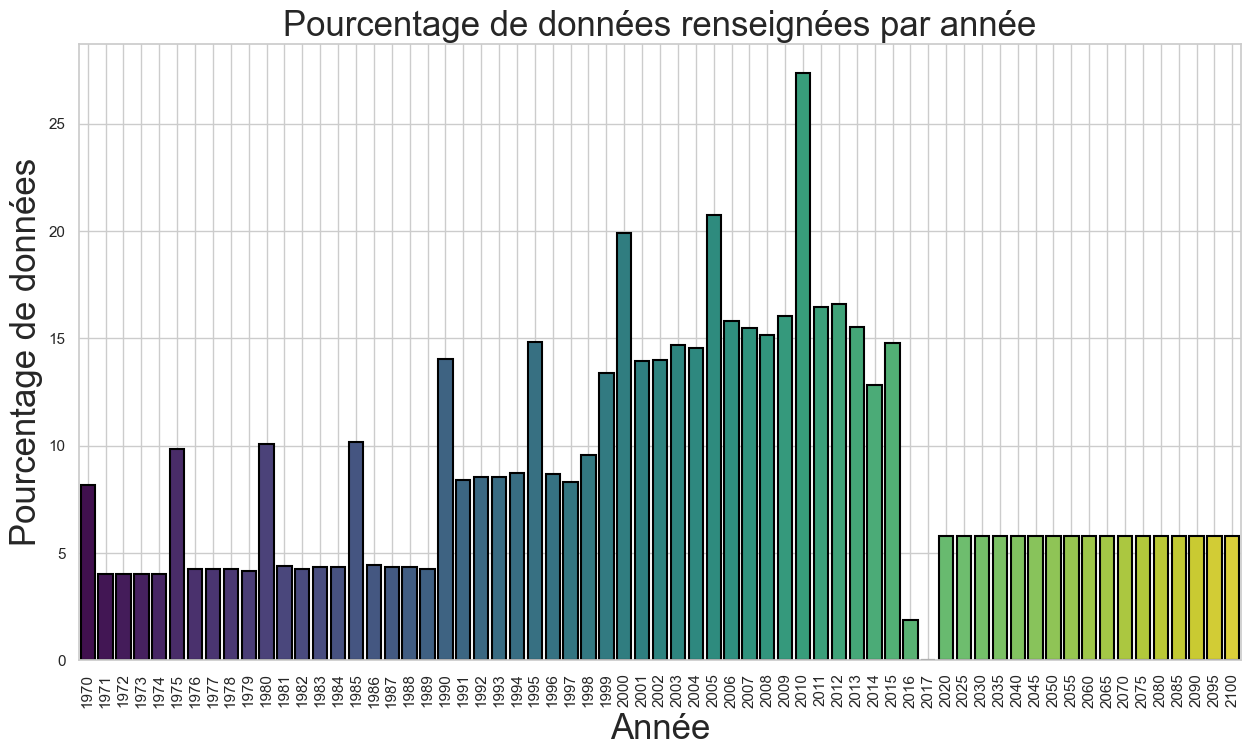

In [145]:
def plot_present_data_percentage(df):
    """
    Crée un graphique en barres représentant le pourcentage de données renseignées pour chaque année et pour tous les indicateurs et tous les pays.

    Args:
    - df: dataframe pandas contenant les données à visualiser

    Returns:
    - None
    """
    plt.figure(figsize=(15, 8))
    # Graphique ligne 1, sur les 2 colonnes 
    ax = plt.subplot()
    # Calcule le pourcentage de données renseignées pour chaque année
    present = df.loc[:, '1970':'2100'].notnull().sum() / len(df) * 100
    
    # Crée un graphique en barres pour représenter les pourcentages de données renseignées
    sns.set_style('whitegrid')
    ax = sns.barplot(x=present.index, y=present, palette='viridis', edgecolor='black', linewidth=1.5)
    
    
    # Ajoute des titres et des libellés pour les axes x et y
    ax.set_title('Pourcentage de données renseignées par année', fontsize=25)
    ax.set_ylabel('Pourcentage de données', fontsize=25)
    ax.set_xlabel('Année', fontsize=25)
    
    # Active la grille pour améliorer la lisibilité du graphique
    ax.grid(True)
    # Affiche les années à la verticale
    ax.tick_params(axis='x', labelrotation=90)
    
    # Enregistre le graphique sous forme de fichier image PNG
    plt.savefig('Pourcentage de données par année.png')
plot_present_data_percentage(EdStatsData)

Après avoir examiné la répartition des données manquantes par année, nous pouvons remarquer que les décennies 90, 2000 et 2010 ont le moins de valeurs manquantes. Ces décennies présentent des données plus complètes et fiables que les autres périodes, ce qui en fait des périodes plus propices à l'analyse et à l'étude des tendances. Pour cette raison, nous allons nous concentrer sur ces trois décennies pour l'analyse de nos données, afin d'avoir une vue plus complète et précise de l'évolution des indicateurs éducatifs au fil du temps.

### Filtre des données EdStatsData sur 1990 à 2015 

In [146]:
def filtrer_donnees(df):
    """
    Cette fonction prend en entrée le dataframe EdStatsData et retourne un nouveau dataframe filtré sur les années 1990 à 2015,
    ainsi qu'une dataframe contenant les informations sur les pays, les indicateurs et les régions.
    
    Args:
    - df: le dataframe contenant les données EdStats
    
    Returns:
    - df_filtered: le dataframe contenant les données filtrées sur les années 1990 à 2015
    - df_info: le dataframe contenant les informations sur les pays, les indicateurs et les régions
    """
    #Filtre de données sur les années 1990:2015
    df_years = df.loc[:, "1990":"2015"]
    df_indic = df.loc[:, ["Country Name", "Country Code", "Indicator Name", "Indicator Code","Region"]]
    df_filtered = pd.concat([df_indic, df_years], axis=1)
    
    return df_filtered, df_indic
df, df_indic = filtrer_donnees(EdStatsData)

In [147]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Region,1990,1991,1992,1993,1994,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,71.995819,72.602837,70.032722,70.464821,72.645683,...,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN


En regardant les données, on se rend compte qu'il y a un grand nombre d'indicateurs et qu'il serait difficile de tous les afficher en même temps. Toutefois, on peut identifier certaines catégories d'indicateurs qui ont tendance à avoir moins de valeurs manquantes que d'autres.

### Analyse des valeurs manquantes selon les catégories d'indicateurs

In [148]:
def pivoter_donnees(df):
    """
    Cette fonction prend en entrée un dataframe et le pivote sur les années avec les indicateurs en colonnes.
    
    Args:
    - df: le dataframe contenant les données
    
    Returns:
    - df_pivot: le dataframe pivoté sur les années avec les indicateurs en colonnes
    """
    df["Indicator Group"] = df["Indicator Code"].apply(lambda x: x.split('.')[0])
    df_melt = df.melt(["Country Name", "Country Code", "Indicator Name", 
                       "Indicator Code","Indicator Group","Region"], 
                        var_name = "year", value_name="count")
    
    df_pivot = df_melt.pivot_table("count", index = "year", columns = "Indicator Group")
    
    return df_pivot
df_pivot = pivoter_donnees(df)

Indicator Group
BAR       19.230769
HH       100.000000
IT       100.000000
LO        69.230769
NY       100.000000
OECD      65.384615
PRJ        7.692308
SABER     26.923077
SE       100.000000
SH       100.000000
SL       100.000000
SP       100.000000
UIS      100.000000
XGDP      69.230769
dtype: float64

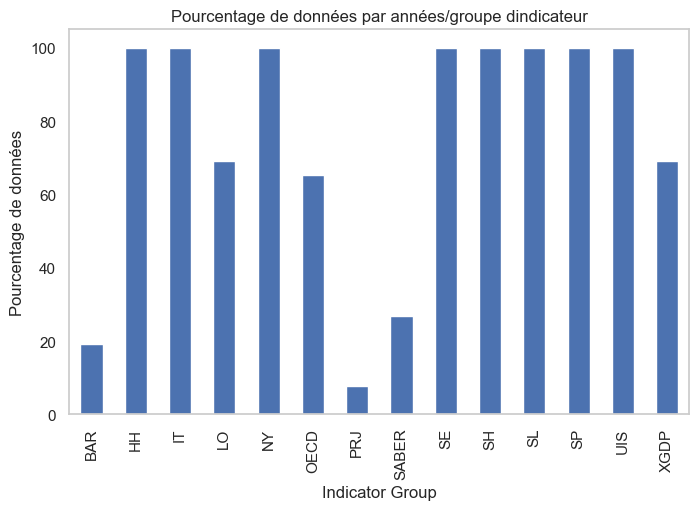

In [149]:
def plot_data_percentage(df_pivot):
    # Calcule le pourcentage de données non nulles par groupe d'indicateurs pour chaque année
    IG_with_data = df_pivot.loc[:,"BAR":].notnull().sum()/len(df_pivot)*100
    
    # Affiche les pourcentages de données non nulles par groupe d'indicateurs
    display(IG_with_data)
    
    # Crée un graphique avec les pourcentages de données non nulles par groupe d'indicateurs
    plt.figure(figsize=(8, 5))
    ax = plt.subplot()
    ax = IG_with_data.plot(kind='bar')
    ax.set_title('Pourcentage de données par années/groupe d''indicateur')
    ax.set_ylabel('Pourcentage de données')
    ax.grid(False)
    
    # Change l'orientation des labels de l'axe X à 90 degrés pour une meilleure lisibilité
    plt.xticks(rotation=90)
    
    # Affiche le graphique
    plt.show()
plot_data_percentage(df_pivot)

Lors de l'analyse des données de l'ensemble des indicateurs dans le jeu de données EdStatsData, nous avons remarqué que certains groupes d'indicateurs ont tendance à avoir plus de valeurs manquantes que d'autres. Plus précisément, les indicateurs avec les codes de préfixe BAR, HH, LO, OECD, PRJ, SABER et XGDP semblent avoir un pourcentage de NAN supérieur à 50%

In [150]:
indicator_selectionner = IG_with_data[IG_with_data["BAR":]>50]

In [151]:
indicator_selectionner

Indicator Group
HH      100.000000
IT      100.000000
LO       69.230769
NY      100.000000
OECD     65.384615
SE      100.000000
SH      100.000000
SL      100.000000
SP      100.000000
UIS     100.000000
XGDP     69.230769
dtype: float64

IT : Infrastructure : utilisateurs internet et ordinateurs(per 100 people)

NY : National Accounts, produits intérieurs et nationaux

SE : Social Education

SH : Social Health

SP : Social Population

UIS: Unesco Institute for Statistics

Pour évaluer l'utilisation d'internet dans les pays et régions, ainsi que les dépenses et la disponibilité des services éducatifs, nous avons besoin d'indicateurs tels que le nombre d'utilisateurs d'internet, le nombre d'étudiants et lycéens, ainsi que les dépenses par étudiant. Ces indicateurs nous permettront de déterminer dans quels pays et régions les citoyens ont la capacité financière d'accéder à des services supplémentaires

### Choix d'indicateurs 

In [153]:
def filter_indicators(df, groups):
    """
    Cette fonction prend en entrée un dataframe et une liste de groupes d'indicateurs à retenir.
    Elle retourne un dataframe filtré contenant uniquement les données relatives aux groupes d'indicateurs choisis.

    Paramètres :
    df : pandas dataframe
        Le dataframe à filtrer
    groups : list
        La liste des groupes d'indicateurs à retenir

    Retour :
    pandas dataframe
        Le dataframe filtré
    """
    return df[df["Indicator Group"].isin(groups)]
IG_retenus = ["IT", "SE", "UIS", "SP"] 
df = filter_indicators(df, IG_retenus)

#### Indicateurs IT

In [154]:
df_IT = df[df["Indicator Group"] == "IT"]
for i in df_IT["Indicator Name"].unique():
        print(i)

Internet users (per 100 people)
Personal computers (per 100 people)


In [155]:
Internet_users = ['Internet users (per 100 people)', 'Personal computers (per 100 people)']

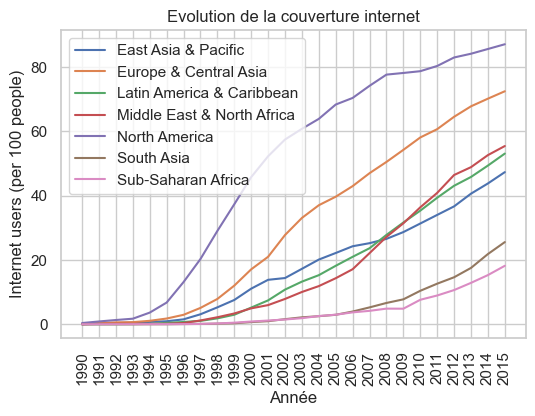

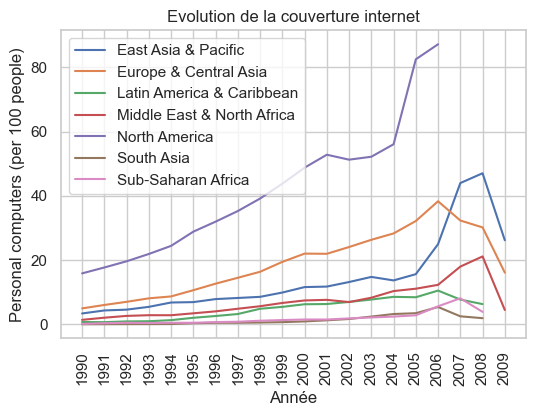

In [160]:
def plot_internet_coverage(df, internet_users, figsize):
    """
    Cette fonction prend en entrée un dataframe (df) et une liste (internet_users) 
    d'indicateurs de couverture internetet affiche un graphique pour chaque indicateur
    montrant l'évolution de la couverture internet par région au fil des ans.
    """
    # Boucle sur chaque indicateur de couverture internet
    for IT in internet_users:
        # Filtre sur les données pour l'indicateur courant
        df_IT = df[df["Indicator Name"] == IT]
        # Création d'une nouvelle figure
        plt.figure(figsize=figsize)
        ax = plt.subplot()
        # Calcul de la moyenne par région et tracé de la courbe pour chaque région
        series = df_IT.groupby("Region").mean()
        for region in series.index:
            ax.plot(series.loc[region, :], label=region)
        # Personnalisation de l'affichage du graphique
        ax.set_title('Evolution de la couverture internet')
        ax.set_ylabel(IT)
        ax.set_xlabel('Année')
        ax.legend()
        ax.tick_params(axis='x', labelrotation=90)
        ax.grid(True)
internet_users = ['Internet users (per 100 people)', 'Personal computers (per 100 people)']
plot_internet_coverage(df, internet_users, figsize=(6, 4))

In [158]:
df_it = df[df["Indicator Group"] == "NY"]
for i in df_it["Indicator Name"].unique():
        print(i)

In [159]:
df["Region"].unique()

array([nan, 'South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

#### Indicateurs SE

In [161]:
df_SE = df[df["Indicator Group"] == "SE"]
for i in df_SE["Indicator Name"].unique():
    if 'both sexes' in i:
        print(i)

Adjusted net enrolment rate, primary, both sexes (%)
Adult literacy rate, population 15+ years, both sexes (%)
Cumulative drop-out rate to the last grade of primary education, both sexes (%)
Effective transition rate from primary to lower secondary general education, both sexes (%)
Enrolment in pre-primary education, both sexes (number)
Enrolment in primary education, both sexes (number)
Enrolment in secondary education, both sexes (number)
Enrolment in secondary general, both sexes (number)
Enrolment in secondary vocational, both sexes (number)
Enrolment in tertiary education, all programmes, both sexes (number)
Graduates from tertiary education, both sexes (number)
Gross enrolment ratio, lower secondary, both sexes (%)
Gross enrolment ratio, pre-primary, both sexes (%)
Gross enrolment ratio, primary to tertiary, both sexes (%)
Gross enrolment ratio, primary, both sexes (%)
Gross enrolment ratio, secondary, both sexes (%)
Gross enrolment ratio, tertiary, both sexes (%)
Gross enrolment

In [106]:
#df[df['Indicator Code']=='SE.TER.ENRL']

In [78]:
Social_education = ['Enrolment in tertiary education, all programmes, both sexes (number)']

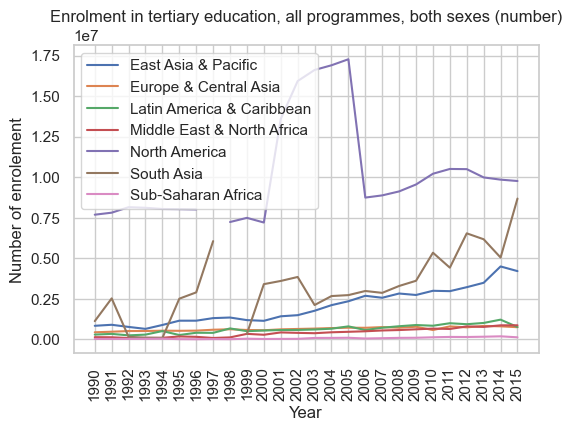

In [162]:
def plot_social_education_indicators(df, indicators_list):
    for indicator in indicators_list:
        df_indicator = df[df["Indicator Name"] == indicator]
        plt.figure(figsize=(6, 4))
        ax = plt.subplot()
        series = df_indicator.groupby("Region").mean()
        for region in series.index:
            ax.plot(series.loc[region, :], label=region)
            ax.set_title(indicator)
            ax.set_ylabel('Number of enrolement')
            ax.set_xlabel('Year')
            ax.legend()
            ax.tick_params(axis='x', labelrotation=90)
            ax.grid(True)
plot_social_education_indicators(df, Social_education)

#### Indicateurs SP

In [163]:
df_POP = df[df["Indicator Group"] == "SP"]
for POP in df_POP["Indicator Name"].unique():
       print(POP)

Population growth (annual %)
Population of the official age for lower secondary education, both sexes (number)
Population of the official age for lower secondary education, female (number)
Population of the official age for lower secondary education, male (number)
Population of the official age for pre-primary education, both sexes (number)
Population of the official age for pre-primary education, female (number)
Population of the official age for pre-primary education, male (number)
Population of the official age for primary education, both sexes (number)
Population of the official age for primary education, female (number)
Population of the official age for primary education, male (number)
Population of the official age for secondary education, both sexes (number)
Population of the official age for secondary education, female (number)
Population of the official age for secondary education, male (number)
Population of the official age for tertiary education, both sexes (number)
Popula

In [83]:
population = ['Population, ages 15-24, total','Population, total']

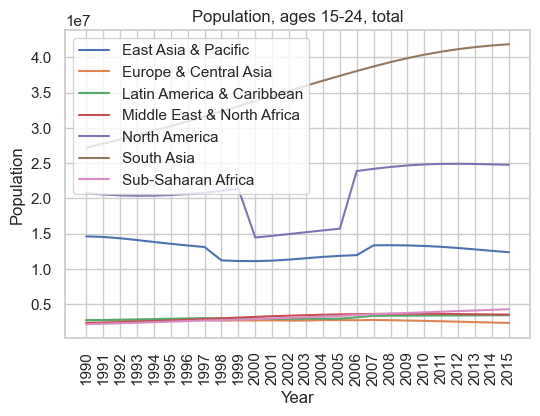

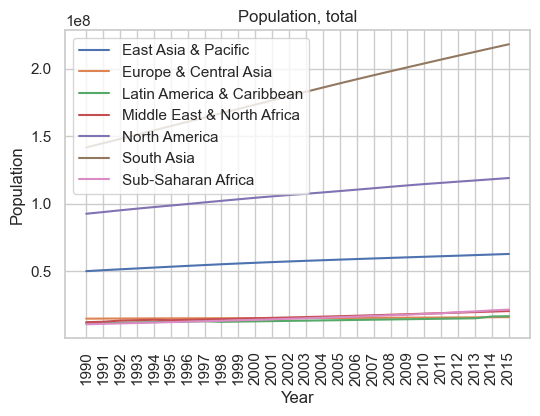

In [164]:
def plot_region_trends(df, indicators, ylabel):
    for ind in indicators:
        df_ind = df[df["Indicator Name"] == ind]
        plt.figure(figsize=(6, 4))
        ax = plt.subplot()
        series = df_ind.groupby("Region").mean()
        for region in series.index :
            ax.plot(series.loc[region, :], label=region)
            ax.set_title(ind)
            ax.set_ylabel(ylabel)
            ax.set_xlabel('Year')
            ax.legend()
            ax.tick_params(axis='x', labelrotation=90)
            ax.grid(True)
plot_region_trends(df, population, 'Population')

#### Indicateurs UIS

In [165]:
df_UIS = df[df["Indicator Group"] == "UIS"]
for uis in df_UIS["Indicator Name"].unique():
       print(uis)

Adjusted net enrolment rate, lower secondary, both sexes (%)
Adjusted net enrolment rate, lower secondary, female (%)
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)
Adjusted net enrolment rate, lower secondary, male (%)
Adjusted net enrolment rate, primary, gender parity index (GPI)
Adjusted net enrolment rate, upper secondary, both sexes (%)
Adjusted net enrolment rate, upper secondary, female (%)
Adjusted net enrolment rate, upper secondary, gender parity index (GPI)
Adjusted net enrolment rate, upper secondary, male (%)
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)
Adjusted net intake rate to Grade 1 of primary education, female (%)
Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)
Adjusted net intake rate to Grade 1 of primary education, male (%)
Adult illiterate population, 15+ years, % female
Adult illiterate population, 15+ years, both sexes (number)
Adult illiterate population, 15+ years, fema

In [166]:
UIS = ['Enrolment in post-secondary non-tertiary education, both sexes (number)','Enrolment in upper secondary education, both sexes (number)']

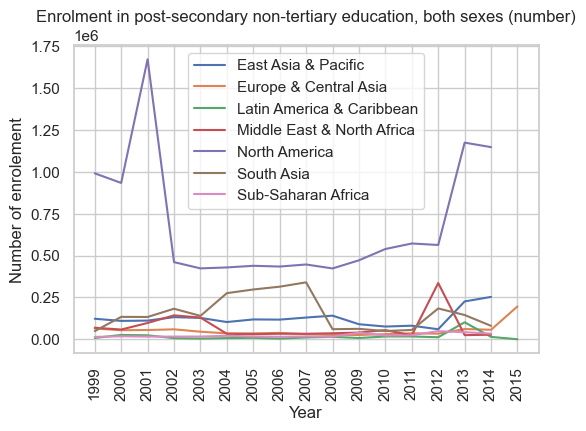

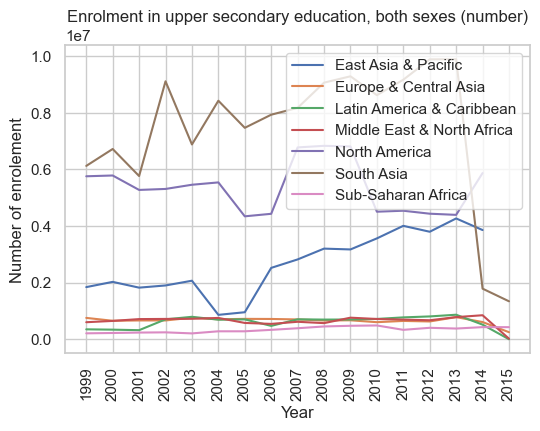

In [167]:
def plot_indicators(indicators):
    for indicator in indicators:
        df_indicator = df[df["Indicator Name"] == indicator]
        plt.figure(figsize=(6, 4))
        ax = plt.subplot()
        series = df_indicator.groupby("Region").mean()
        for region in series.index:
            ax.plot(series.loc[region, :], label=region)
        ax.set_title(indicator)
        ax.set_ylabel('Number of enrolement')
        ax.set_xlabel('Year')
        ax.legend()
        ax.tick_params(axis='x', labelrotation=90)
        ax.grid(True)
plot_indicators(UIS)

### Sélection de pays prioritaires

In [116]:
def select_indicators(df):
    """
    Cette fonction prend en entrée le dataframe df et sélectionne les indicateurs 
    liés à l'utilisation d'internet, l'éducation sociale, la population et l'UIS.
    
    Args:
    - df: le dataframe contenant les données EdStats
    
    Returns:
    - df_short: le dataframe contenant les indicateurs sélectionnés
    """
    # Liste des indicateurs à sélectionner
    All_indicators = Internet_users  + Social_education + population + UIS
    
    # Sélection des indicateurs
    df_short = df[df['Indicator Name'].isin(All_indicators)]
    
    return df_short
df_short = select_indicators(df)

In [169]:
df_short.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Indicator Group
1171,Arab World,ARB,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN,NaN,NaN,NaN,NaN,NaN,...,308639.25,2.905856e+05,2.742247e+05,248527.25,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN,UIS
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,2406849.75,2391953.25,2568057.0,2817956.5,3019343.25,...,7588664.00,8.006892e+06,8.382284e+06,8715273.00,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN,SE
1214,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,NaN,NaN,NaN,NaN,NaN,6872654.00,...,10374816.00,1.030286e+07,1.017877e+07,10644779.00,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,NaN,UIS


In [170]:
countries = df_short["Country Name"].drop_duplicates()
print(countries.head(10))

1171                                        Arab World
4836                               East Asia & Pacific
8501       East Asia & Pacific (excluding high income)
12166                                        Euro area
15831                            Europe & Central Asia
19496    Europe & Central Asia (excluding high income)
23161                                   European Union
26826           Heavily indebted poor countries (HIPC)
30491                                      High income
34156                        Latin America & Caribbean
Name: Country Name, dtype: object


In [172]:
def select_countries(df_short):
    """
    Cette fonction prend en entrée le dataframe df_short filtré sur 
    les indicateurs pertinents et sélectionne un sous-ensemble de pays.

    Args:
    - df_short: le dataframe filtré sur les indicateurs pertinents

    Returns:
    - df_final: le dataframe filtré sur les indicateurs et les pays sélectionnés, 
      avec une colonne contenant la moyenne des valeurs pour la période 2010-2015
    """
    # Sélection des pays à partir de l'indice 25
    countries = df_short["Country Name"].drop_duplicates()[25:].values
    df_final = df_short[df_short["Country Name"].isin(countries)]

    # Calcul de la moyenne des valeurs pour la période 2010-2015
    df_final["mean_2010_2015"] = df_final.loc[:, "2010":"2015"].mean(axis=1)

    return df_final
df_final = select_countries(df_short)

/var/folders/s2/hzy_2v4s2c783mp9rjk7tjzh0000gn/T/ipykernel_35969/3985444222.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["mean_2010_2015"] = df_final.loc[:, "2010":"2015"].mean(axis=1)


In [174]:
df_final.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,1990,1991,1992,1993,1994,...,2008,2009,2010,2011,2012,2013,2014,2015,Indicator Group,mean_2010_2015
92796,Afghanistan,AFG,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,South Asia,NaN,NaN,NaN,NaN,NaN,...,34380.00,31386.00,51694.0,76969.0,90700.000000,120216.0,145220.0,NaN,UIS,96959.800000
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,South Asia,24333.0,NaN,NaN,NaN,NaN,...,NaN,95185.00,NaN,97504.0,NaN,NaN,262874.0,NaN,SE,180189.000000
92839,Afghanistan,AFG,"Enrolment in upper secondary education, both s...",UIS.E.3,South Asia,NaN,NaN,NaN,NaN,NaN,...,361193.00,443002.00,567344.0,743405.0,881415.000000,969267.0,968769.0,NaN,UIS,826040.000000
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,South Asia,0.0,NaN,NaN,NaN,NaN,...,1.84,3.55,4.0,5.0,5.454545,5.9,7.0,8.26,IT,5.935758


In [175]:
df_final.sort_values(by="mean_2010_2015", ascending=False)[['Country Name', 'Indicator Name','Indicator Code','mean_2010_2015']]

,Country Name,Indicator Name,Indicator Code,mean_2010_2015
244423,China,"Population, total",SP.POP.TOTL,1.354233e+09
416678,India,"Population, total",SP.POP.TOTL,1.270460e+09
849148,United States,"Population, total",SP.POP.TOTL,3.151125e+08
420343,Indonesia,"Population, total",SP.POP.TOTL,2.504067e+08
416627,India,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.401628e+08
...,...,...,...,...
880771,Zambia,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN
880814,Zambia,"Enrolment in upper secondary education, both s...",UIS.E.3,NaN
881684,Zambia,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN
884436,Zimbabwe,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN


In [176]:
df_final = df_final.pivot_table("mean_2010_2015", index = "Country Name", columns = "Indicator Code")

In [177]:
df_final.reset_index(inplace = True)

In [178]:
df_final

Indicator Code,Country Name,IT.NET.USER.P2,SE.TER.ENRL,SP.POP.1524.TO.UN,SP.POP.TOTL,UIS.E.3,UIS.E.4
0,Afghanistan,5.935758,1.801890e+05,6.679801e+06,3.123915e+07,826040.00,96959.8
1,Albania,54.868149,1.542362e+05,5.856280e+05,2.897253e+06,149867.00,1889.0
2,Algeria,22.633333,1.221773e+06,6.869491e+06,3.797107e+07,1319508.00,NaN
3,American Samoa,NaN,NaN,NaN,5.541133e+04,NaN,NaN
4,Andorra,89.207404,5.070000e+02,NaN,8.144267e+04,1222.00,463.0
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),42.929506,NaN,NaN,1.049678e+05,NaN,NaN
213,West Bank and Gaza,46.595699,2.127117e+05,9.650522e+05,4.111898e+06,147944.40,555.5
214,"Yemen, Rep.",18.556152,2.698140e+05,5.688936e+06,2.525130e+07,642312.75,NaN
215,Zambia,15.061367,5.621950e+04,2.891667e+06,1.494825e+07,NaN,NaN


In [130]:
def create_customer_indicators(df):
    """
    Crée trois nouveaux indicateurs dans le dataframe df_final:
    - 'customers': le nombre total d'étudiants du secondaire et de 
       l'enseignement supérieur dans chaque pays
    - 'potential_customers': estime le nombre potentiel de clients en
       multipliant le nombre total d'étudiants par le taux de pénétration 
       d'internet dans chaque pays
    - 'df_country_customers': les 20 pays ayant le plus grand nombre total 
       d'étudiants du secondaire et de l'enseignement supérieur
    - 'df_country_IT': les 20 pays ayant le taux de pénétration d'internet le plus élevé
    - 'df_country_Pot_cust': les 20 pays ayant le nombre potentiel de clients le plus élevé
    
    Args:
    - df: le dataframe contenant les données filtrées sur les indicateurs sélectionnés
    
    Returns:
    - df_final: le dataframe contenant les nouveaux indicateurs
    - df_country_customers: les 20 pays ayant le plus grand nombre total d'étudiants du secondaire et de l'enseignement supérieur
    - df_country_IT: les 20 pays ayant le taux de pénétration d'internet le plus élevé
    - df_country_Pot_cust: les 20 pays ayant le nombre potentiel de clients le plus élevé
    """
    
    # Création de l'indicateur 'customers'
    df['customers'] = df['UIS.E.3'] + df['UIS.E.4'] + df['SE.TER.ENRL']
    
    # Création de l'indicateur 'potential_customers'
    df['potential_customers'] = df['customers'] * df['IT.NET.USER.P2']/100
    
    # Sélection des 20 pays ayant le plus grand nombre total d'étudiants
    df_country_customers = df.sort_values(by='customers', ascending=False)[['Country Name','customers']].head(20)
    
    # Sélection des 20 pays ayant le taux de pénétration d'internet le plus élevé
    df_country_IT = df.sort_values(by='IT.NET.USER.P2', ascending=False)[['Country Name','IT.NET.USER.P2']].head(20)
    
    # Sélection des 20 pays ayant le nombre potentiel de clients le plus élevé
    df_country_Pot_cust= df.sort_values(by='potential_customers', ascending=False)[['Country Name','potential_customers']].head(20)
    
    return df, df_country_customers, df_country_IT, df_country_Pot_cust
df, df_country_customers, df_country_IT, df_country_Pot_cust = create_customer_indicators(df_final)

In [131]:
df_country_IT.reset_index(inplace = True, drop=True)

In [179]:
df_country_Pot_cust.head(10)

Indicator Code,Country Name,potential_customers
41,China,3.488083e+07
206,United States,2.378500e+07
88,India,1.245867e+07
26,Brazil,8.838943e+06
160,Russian Federation,6.496513e+06
97,Japan,6.358859e+06
72,Germany,5.324097e+06
205,United Kingdom,5.110272e+06
67,France,4.020268e+06
90,"Iran, Islamic Rep.",2.805933e+06


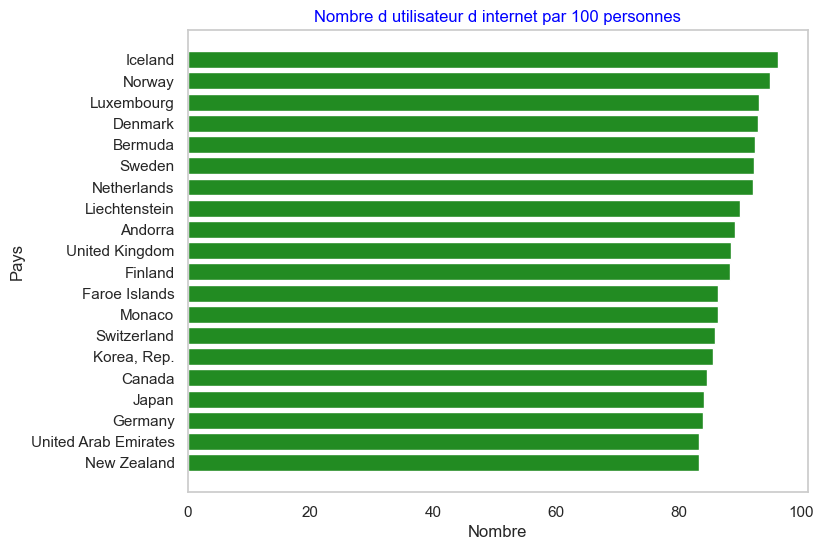

In [180]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.barh(y = df_country_IT['Country Name'], width = df_country_IT['IT.NET.USER.P2'], color='forestgreen')
ax.set_title('Nombre d utilisateur d internet par 100 personnes', color='blue')
ax.invert_yaxis()
ax.set_ylabel('Pays')
ax.set_xlabel('Nombre')
ax.grid(False)

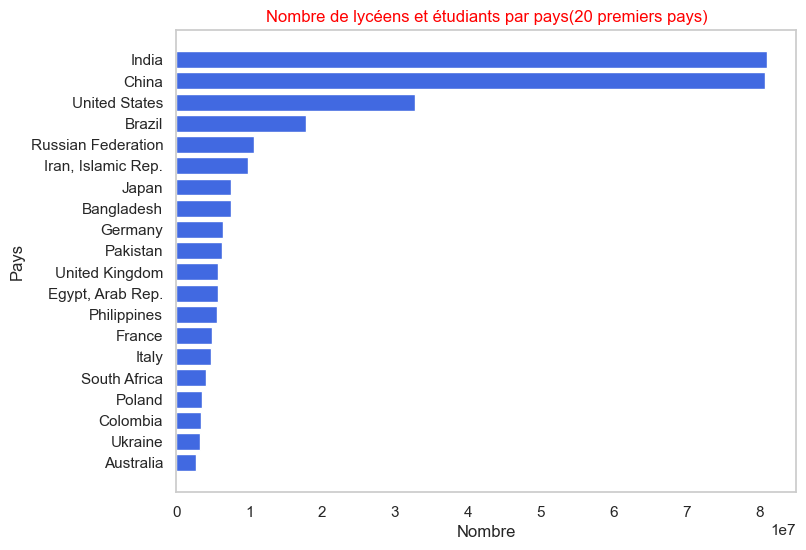

In [181]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.barh(y = df_country_customers['Country Name'], width = df_country_customers['customers'], color='royalblue')
ax.set_title('Nombre de lycéens et étudiants par pays(20 premiers pays)', color='red')
ax.invert_yaxis()
ax.set_ylabel('Pays')
ax.set_xlabel('Nombre')
ax.grid(False)

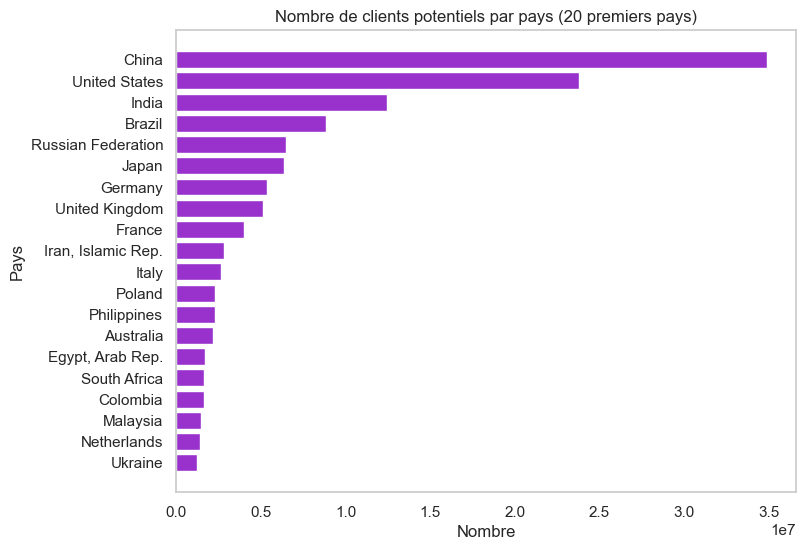

In [182]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.barh(y = df_country_Pot_cust['Country Name'], width = df_country_Pot_cust['potential_customers'], color='darkorchid')
ax.set_title('Nombre de clients potentiels par pays (20 premiers pays)')
ax.invert_yaxis()
ax.set_ylabel('Pays')
ax.set_xlabel('Nombre')
ax.grid(False)